<a href="https://colab.research.google.com/github/DigitalSocrates/DataScience/blob/master/Clustering_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Clustering Techniques with Scikit-Learn

In our quest to gain a deeper understanding of clustering, we will harness the power of the Scikit-Learn library. This journey will take us through various clustering algorithms, allowing us to uncover insights and patterns within our data.

## Introduction to Clustering

Clustering is a fundamental technique in the realm of unsupervised machine learning. It enables us to group similar data points together, making it an essential tool for tasks like customer segmentation, anomaly detection, and more.

## The Scikit-Learn Library

Scikit-Learn, often abbreviated as sklearn, is a versatile and widely-used machine learning library in Python. It provides a rich set of tools and algorithms for various machine learning tasks, including clustering. Leveraging sklearn's capabilities, we can efficiently apply clustering techniques to our data and gain valuable insights.

## Our Clustering Journey

Throughout our experimentation, we will delve into different clustering algorithms offered by Scikit-Learn, such as K-Means, Hierarchical Clustering, and DBSCAN, among others. Each algorithm has its own unique characteristics and is suited to different types of data and scenarios. By comparing and contrasting these algorithms, we will develop a deeper understanding of when and how to apply them effectively.

## Key Objectives

Our primary objectives in these clustering experiments include:

1. **Understanding Algorithm Behavior:** We aim to comprehend how different clustering algorithms work under various circumstances and data distributions.

2. **Evaluating Cluster Quality:** We will explore metrics like silhouette score, Davies-Bouldin index, and more to assess the quality and coherence of clusters generated by each algorithm.

3. **Visualizing Clusters:** Utilizing visualization techniques, we will represent our clustered data in meaningful ways to facilitate interpretation and decision-making.

4. **Real-world Applications:** We will also discuss real-world use cases where clustering plays a crucial role, such as customer segmentation, image segmentation, and anomaly detection.

## Conclusion

Our journey into the world of clustering with Scikit-Learn promises to be an enlightening experience. By the end of these experiments, we aim to equip ourselves with a deeper understanding of clustering techniques, enabling us to apply them effectively in diverse data analysis and machine learning projects.

In [ ]:
# installations
!pip install sklearn --quiet
!pip install pydantic==1.* --quiet
# !pip install pydantic-core==1.* --quiet
!pip install mlflow --quiet

In [ ]:
# let us check on mlflow version
!pip list | grep mlflow

For our first experiment we will use synthetic data 

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

We start by generating synthetic data using make_blobs from Scikit-Learn.

In [2]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

Let us see what we got - visualize the synthetic data using Matplotlib.

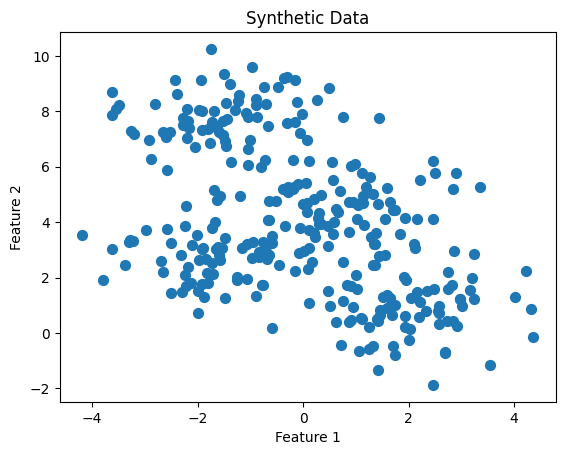

In [3]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


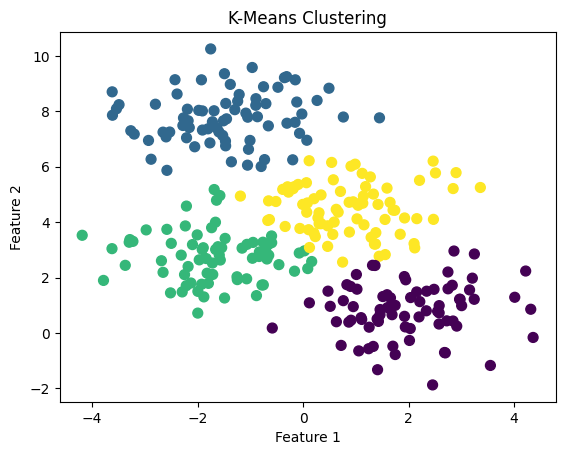

In [5]:
# Visualize K-Means clustering results
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
# Perform Hierarchical (Agglomerative) Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(X)

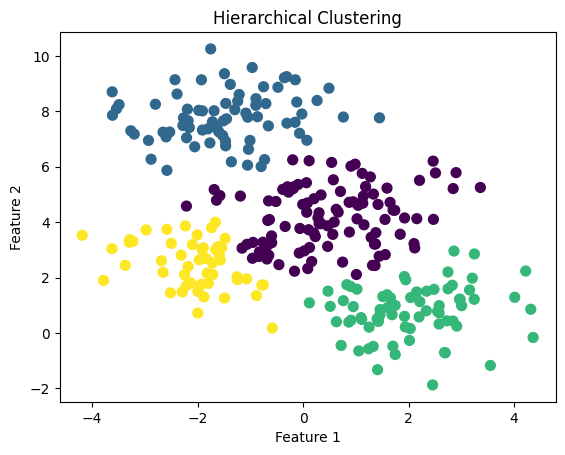

In [7]:
# Visualize Hierarchical clustering results
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, s=50, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [8]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

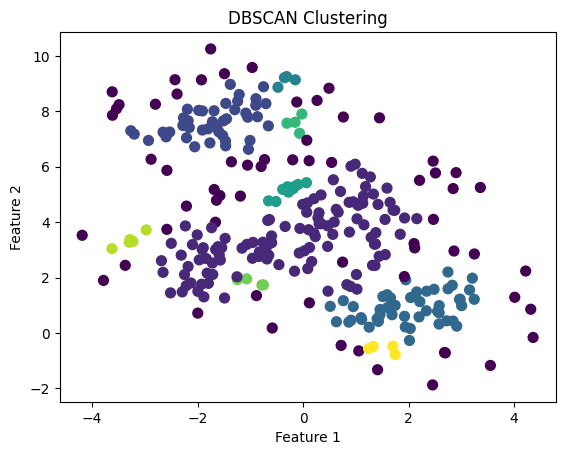

In [9]:
# Visualize DBSCAN clustering results
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Let us proceed and apply the same concepts or a sports data 

In [23]:
# imports 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import pandas as pd

Let's load a dataset

In [24]:
# data location url
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
# read the csv and load the data into pandas DF
val_housing_win_df = pd.read_csv(team_data)
# get the columns to be used in the example
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]

In [25]:
# let us what we have got
numerical_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.888882,1519,2500,269900.0
1,0.811366,1420,1450,314990.0
2,0.721928,1393,1075,343950.0
3,0.805400,1569,1350,389000.0
4,0.813050,1600,1125,390000.0


Pipline time! Use Sklearn Pipeline and time it

In [26]:
%%timeit
# Fit to data and predict using pipelined scaling, KMeans.
std_clf = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
kmeans = std_clf.fit(numerical_df)

i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
i:\workspace\Experiments_in_Dat

16.3 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Let us see what is under the "hood" of the new cluster using yellowbrick lib

In [27]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(numerical_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

ModuleNotFoundError: No module named 'yellowbrick'

Looked at the scaled version

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

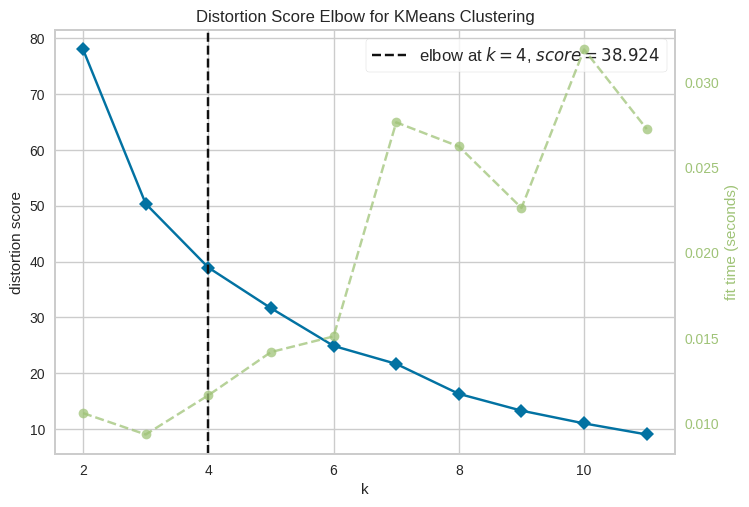

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
scaler = StandardScaler()
scaler.fit(numerical_df)
visualizer = KElbowVisualizer(model, k=(2,12))
# Fit the SCALED data to the visualizer
visualizer.fit(scaler.transform(numerical_df))
visualizer.poof()    # Draw/show/poof the data

Add silhouetter analysis

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
visualizer = SilhouetteVisualizer(KMeans(4))

visualizer.fit(scaler.transform(numerical_df)) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data


ModuleNotFoundError: No module named 'yellowbrick'

Yellowbrick Silhouette Visualizer-reference plot

Incorrect cluster selection

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


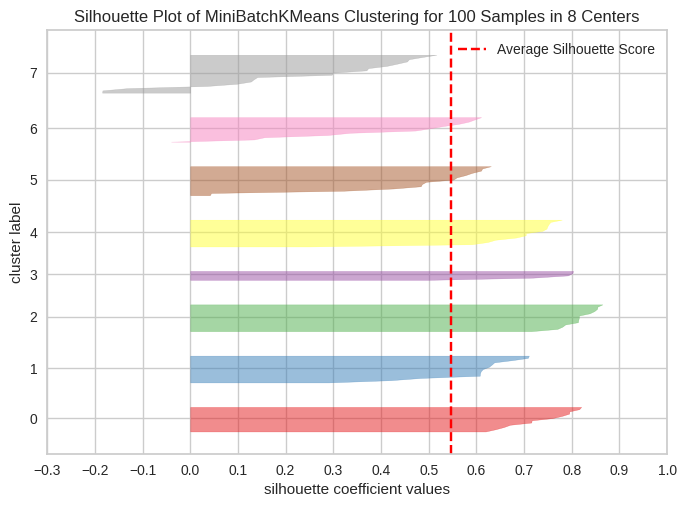

<Axes: title={'center': 'Silhouette Plot of MiniBatchKMeans Clustering for 100 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs

# Make 8 blobs dataset
X, y = make_blobs(centers=8)

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data


K-Means Intercluster Distance Maps

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


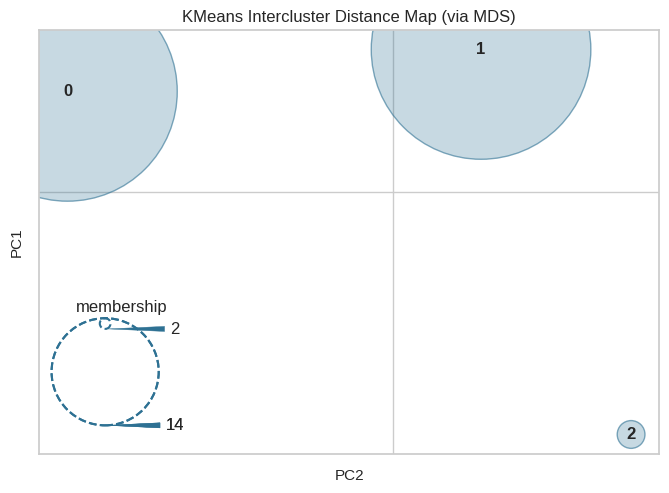

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [20]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(3))

visualizer.fit(scaler.transform(numerical_df)) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

Yellowbrick Intercluster Distance Maps-reference plot

In [21]:
from sklearn.datasets import make_blobs

# Make 12 blobs dataset
X, y = make_blobs(centers=8, n_samples=1000, n_features=16, shuffle=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


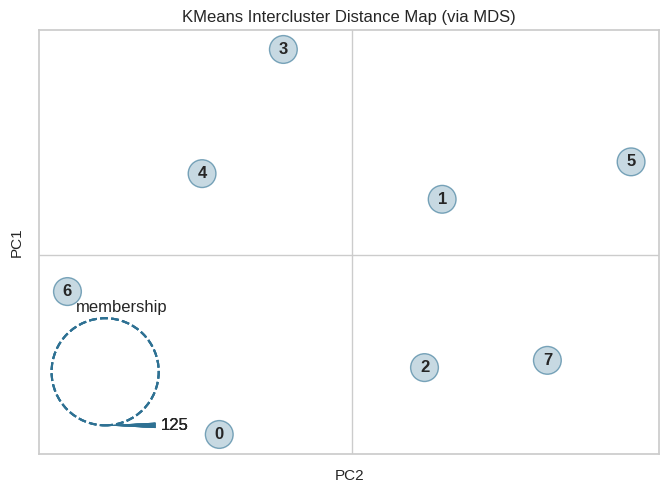

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [22]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(8))

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

K-means Computational Challenges

In [23]:
%%time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

def do_kmeans():
    """KMeans clustering on generated data"""

    X,_ = make_blobs(n_samples=100000, centers=3, n_features=10,
                random_state=0)
    kmeans = KMeans(n_clusters=3)
    t0 = time.time()
    kmeans.fit(X)
    print(f"KMeans cluster fit in {time.time()-t0}")

def run_serial():
    """Run Everything"""

    count = 25
    t0 = time.time()
    for _ in range(count):
        do_kmeans()

run_serial()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.7829568386077881


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6368980407714844


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.38747143745422363


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.7551162242889404


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.46986818313598633


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.45604538917541504


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6979379653930664


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5854811668395996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5905413627624512


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5375537872314453


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6291015148162842


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6762125492095947


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.9657702445983887


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.8050839900970459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.9051847457885742


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6032719612121582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.7472734451293945


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.7557125091552734


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.36642956733703613


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.8194835186004639


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.8200395107269287


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.6831929683685303


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5880532264709473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.8478484153747559


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans cluster fit in 0.5854015350341797
CPU times: user 20.2 s, sys: 10 s, total: 30.2 s
Wall time: 19.2 s


Run multiprocessing

In [24]:
import multiprocessing

multiprocessing.cpu_count()

2

In [ ]:
%%time
from multiprocessing import Pool
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

def do_kmeans(n_samples):
    """KMeans clustering on generated data"""

    X,_ = make_blobs(n_samples, centers=3, n_features=10,
                random_state=0)
    kmeans = KMeans(n_clusters=3)
    t0 = time.time()
    kmeans.fit(X)
    print(f"KMeans cluster fit in {time.time()-t0}")

def run_parallel():
    """Run Everything"""

    count = 25
    t0 = time.time()
    with Pool(10) as p:
        p.map(do_kmeans, [100000 for x in range(count)])
    print(f"Performed {count} KMeans in total time: {time.time()-t0}")

run_parallel()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Visualizing K-Means

Cluster using sklearn pipeline

In [ ]:

std_clf = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
std_clf.fit(numerical_df)
kmeans_labels = std_clf.predict(numerical_df)
val_housing_win_df['cluster'] = kmeans_labels
val_housing_win_df.head()

Seaborn Faceted Plot #1: Facet by binary value, but color clusters

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(val_housing_win_df, col="CONF",
                  hue="cluster", palette="Set1")
g = (g.map(plt.scatter, "VALUE_MILLIONS", "ELO", **kws).add_legend())

In [ ]:

kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(val_housing_win_df, col="cluster",
                  hue="MEDIAN_HOME_PRICE_COUNTY_MILLIONS", palette="Reds",
                  col_wrap=3, height=2.5)
g = (g.map(plt.scatter, "VALUE_MILLIONS", "ELO", **kws).add_legend())


save file

In [ ]:
val_housing_win_df.to_csv("nba_teams_clustered.csv")